In [1]:
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report, accuracy_score

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/azhar2ds/DataSets/master/bc_clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X=data.drop('diagnosis', axis=1)
y=data['diagnosis']

l=LabelEncoder()
y=l.fit_transform(y)

We can avoid the running the cell below. But you will get only 63% accuracy. And if we standardized our values then we will get
97% accuracy. So for optimization we are Scaling our X values.

In [4]:
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test=train_test_split(Xs,y,test_size=0.3, random_state=0)

In [6]:
c=SVC(probability=True,random_state=2, gamma='scale')
c.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
    verbose=False)

In [7]:
pre=c.predict(X_test)

In [8]:
accuracy_score(pre, y_test)# 0.9767

0.9766081871345029

In [9]:
#Score can be calculated with METRICS.ACCURACY_SCORE() AND SCORE()
classifier_score = c.score(X_test, y_test)
print('The classifier accuracy score is :', classifier_score)

The classifier accuracy score is : 0.9766081871345029


In [10]:
n_folds = 6
scores = cross_val_score(SVC(), Xs, y, cv=n_folds)
print('Each individual fold val:',scores)
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print("\nAccuracy Score average of folds is: ", cv_error)
print("\nAnother way of finding average accuracy of folds is(np.average(list(scores)):", np.average(list(scores)))



Each individual fold val: [0.97894737 0.93684211 0.98947368 0.97894737 0.97894737 0.96808511]

Accuracy Score average of folds is:  0.9718738335199703

Another way of finding average accuracy of folds is(np.average(list(scores)): 0.9718738335199703


In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=n_folds),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=n_folds)

# Get average of 3-fold cross-validation score using an SVC estimator.

cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print(cv_error)

0.9718738335199703


In [12]:
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.92631579 0.93684211 0.94736842 0.97894737 0.95789474 0.96808511]
Average score and uncertainty: (95.26 +- 0.732)%


####Model Accuracy: Receiver Operating Characteristic (ROC) curve####

In [14]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = c.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)


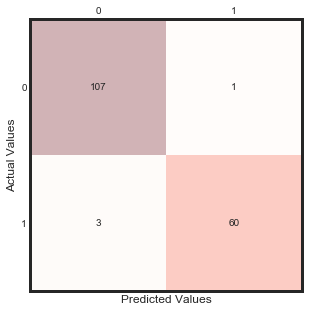

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


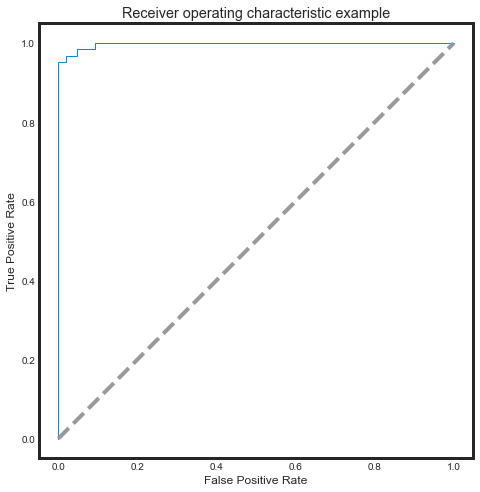

In [16]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = c.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

In [ ]:
!